In [4]:
import tensorflow as tf
from tensorflow import keras
print(tf.version)

<module 'tensorflow._api.v2.version' from 'd:\\dev\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Load data

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# One-hot encoding untuk label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 4s 0us/step


## Buat model

In [7]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fit model

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/20
422/422 [==============================] - 1s 2ms/step - loss: 0.4601 - accuracy: 0.8621 - val_loss: 0.1429 - val_accuracy: 0.9597
Epoch 2/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2062 - accuracy: 0.9385 - val_loss: 0.1117 - val_accuracy: 0.9660
Epoch 3/20
422/422 [==============================] - 1s 2ms/step - loss: 0.1578 - accuracy: 0.9524 - val_loss: 0.0913 - val_accuracy: 0.9740
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.1275 - accuracy: 0.9617 - val_loss: 0.0796 - val_accuracy: 0.9773
Epoch 5/20
422/422 [==============================] - 1s 2ms/step - loss: 0.1094 - accuracy: 0.9665 - val_loss: 0.0756 - val_accuracy: 0.9780
Epoch 6/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0981 - accuracy: 0.9694 - val_loss: 0.0725 - val_accuracy: 0.9775
Epoch 7/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9742 - val_loss: 0.0728 - val_accuracy: 0.9782
Epoch 

## Eval Model

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9798


## Confusion matrix

313/313 [==============================] - 0s 540us/step


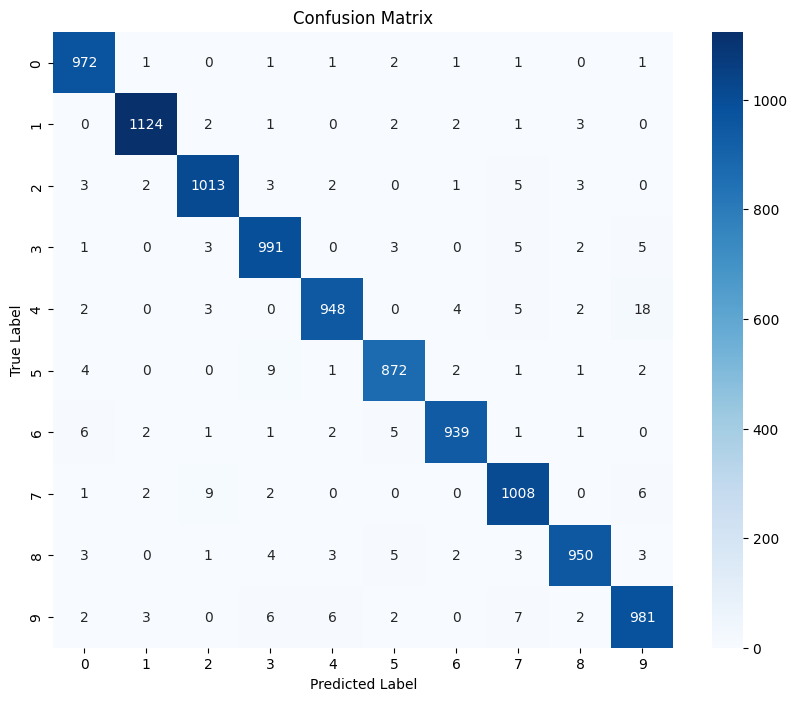

In [10]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Visualisasi hasil

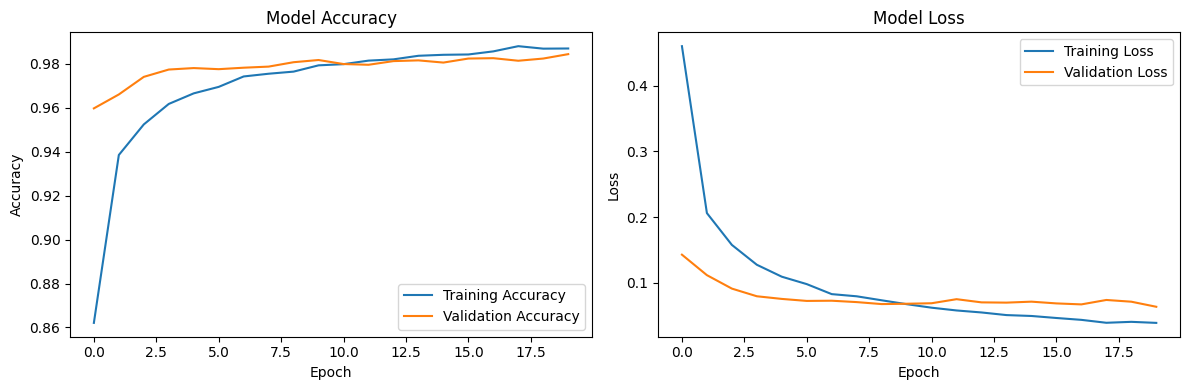

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()